# BCBGSO Fall 2018 Advanced Python Workshop

## Section 2: Jupyter Notebook

Jupyter Notebooks are documents combining computer code and rich text.  This allows you to combine human-readable prose with your code so that you can communicate what your program is doing along with its outputs.  A common example of where Jupyter Notebooks are used are in sharing your research.  When sharing research with your PI or collaborator, you might send them a `.py` file for them to run themselves along with some  email/`.txt` file.  However, they might not know how to run the code, or the `.txt` might be separated, or you might be constantly updating the code.  Sending them a Jupyter Notebook, or hosting a Jupyter Notebook online, will make it so that they don't have to know how to run the code, your thought process is well-documented alongside the code, and you can push updates to your documented hosted online so that they always have access to the latest version of your work.

Jupyter Notebooks are pretty simple to use, but they are incredibly useful.  You can read more in-depth about them [here](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html).  However, the best way to learn how to use them is to just get in there.  Let's get started.

## Section 2.1: Your first Notebook

To get started, launch Jupyter Notebook from Anaconda Navigator or from the command line by typing `jupyter notebook`.  You'll see a screen like this:

![alt text](images/jupyter-notebook-1.png)

From here, you can create a new Notebook by clicking `New > Python 3`.  Doing so will take you to a screen like this:

![alt text](images/jupyter-notebook-2.png)

Jupyter Notebooks are comprised of cells.  Cells can be one of two types: code cell or a Markdown cell.  You can tell if a cell is a code cell because it will have an `In [ ]` box next to it.  In these boxes, you can type in Python code and `run` the cell by either clicking the `Run` button at the top of the screen or highlighting the cell and pressing `Shift + Enter`.  For example:

In [1]:
first_ten = [i for i in range(10)]
first_ten

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
for num in first_ten:
    print("{} squared is {}".format(num, num ** 2))

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81


Let's go ahead and create a Markdown cell.  To create a new cell, click `Insert > Insert Cell Below`.  This will create a new code cell beneath wherever the currently highlighted cell.  To change this to a Markdown cell, click the cell, press `Escape` so that the border highlighting it is blue, then press `m` - this will transform the cell from a code cell to a Markdown cell.  You'll be able to tell this is a Markdown cell because there won't be an `In [ ]` to the left of the box.  Click on the box and type some text in there.  To switch a cell back to a code cell, highlight the box, press escape so that the outline is blue, then press `y`.  

Markdown cells support any Markdown syntax.  For example, to make text different size, entering...

```
# H1
## H2
### H3
#### H4
##### H5
###### H6
```

...will produce...

# H1
## H2
### H3
#### H4
##### H5
###### H6

Entering... 

```
*Italicized text*
**Bolded Text**
~~Strikethrough text~~
```

...will produce...

*Italicized text*

**Bolded Text**

~~Strikethrough text~~

See [adam-p's Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) for more information about Markdown.

## Section 2.2: Some basic data analysis

In our first Jupyter Notebook, we'll do some basic data analysis with pandas on the "20 Years of Gaming" data set put together by [Eric Grinstein](https://www.kaggle.com/egrinstein).  This data set contains 20 years of game review scores from ign.com.  Download the dataset from [here](https://github.com/pommevilla/bcb.fall2018.advanced.python/blob/master/lessons/data/ign.csv) by right-clicking `Download` and clicking `Save link as...`.  

You can work with a Jupyter Notebook just like you would any IDE, such as importing modules and reading in files.  Any paths you use will be relative to the directory the notebook itself is in.  

In [9]:
import pandas as pd
reviews = pd.read_csv("./data/ign.csv")

Let's learn more about the data set that we're working with.

In [10]:
reviews.shape

(18625, 11)

So we have a table with 18625 rows and 11 columns.  Let's check out the first few observations:

In [11]:
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


It looks like the first column, `'Unnamed:0` is not providing us any useful info.  Let's get rid of it.

In [12]:
del reviews["Unnamed: 0"]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Let's find out the mean review score for all the games:

In [15]:
reviews["score"].mean()

6.950459060402666

So the average score of games across all platforms was 6.95.  Let's get a count of how many games were above the average score:

In [32]:
len(reviews[reviews['score'] > reviews["score"].mean()])

11373

So out of a total of 18625 reviews, 11373 of them were higher than the average score...

Let's make a histogram of all the reviews.  We use the `%matplotlib inline` command to display plots in our Jupyter Notebook.

In [67]:
%matplotlib inline
import matplotlib.pyplot as plot;

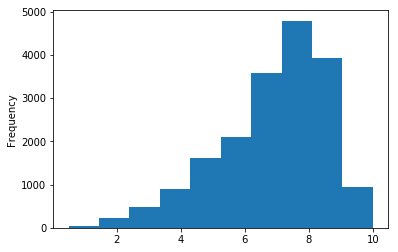

In [65]:
reviews["score"].plot(kind = "hist")

We can also make a histogram of the review scores for each individual system:

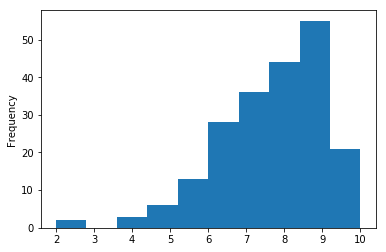

In [66]:
reviews[reviews["platform"] == "Xbox One"]["score"].plot(kind = "hist");

We can also make a boxplot of the review scores:

In [37]:
import seaborn as sns

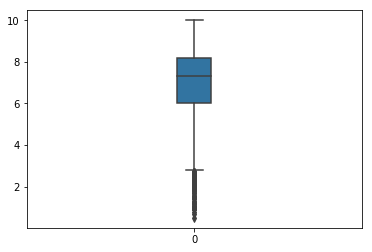

In [42]:
sns.boxplot(data = reviews["score"], width = 0.10)

Anything interesting going on here with the distribution of review scores?

We can also make boxplots for each individual Platform:

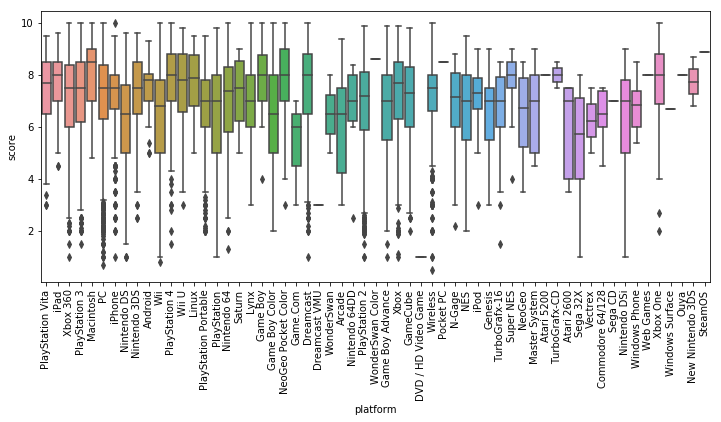

In [59]:
plot.subplots(figsize = (12,5))
reviews_boxplot_by_platform = sns.boxplot(x = 'platform', y = 'score', 
                                          data = reviews)

reviews_boxplot_by_platform.set_xticklabels(reviews_boxplot_by_platform.get_xticklabels(),
                                            rotation = 90);


In [62]:
hists_by_system = sns.FacetGrid(reviews, col = "platform", col_wrap = 5, height = 1.5)
hists_by_system = hists_by_system.map(plot.hist, "score")

TypeError: __init__() got an unexpected keyword argument 'height'

### Exercise 2.2

1. Print out the histograms for each 
2. Print out the correlation matrix for `reviews`.  Anything interesting going on between the numerical values here?    Look up the correlation matrix method documentation for pandas data frame.  What kind of correlation is being calculated by default?  What other options are there?


## Section 2.3 : Hosting a notebook online

You can host a Jupyter Notebook online to easily share it with others.  The full power of Git is outside the scope of this workshop, but I will introduce a basic workflow of how to use it.  The bare bones way to get your Notebook up and running on Github is to:

* Create a new repo
* Clone the repo to your local machine
* Move your notebook into the repo
* `add`, `commit`, and `push` the notebook to the remote.

Then, from there, you can share the link to the `.ipynb` file, or an `nbviewer` link, with whoever you'd like.  Once the notebook is on your github, you can update the Notebook hosted online by repeating the last step whenever you make changes.

### Exercise 2.2

1. Create a repo for your new Notebook and push it online.

[Previous Section: Introduction](advanced.python.1.ipynb)<br>
[Next Section: Pandas](advanced.python.3.ipynb)